In [103]:
import os
from os import listdir
from os import path
from os.path import isfile, join, getsize
import re
import pandas as pd

import json
import io
import glob

#need this for some stupid reason to import essentia
import sys
sys.path.append("/usr/local/lib/python3.8/site-packages")
import essentia
import essentia.standard as es

In [104]:
ext_drive_dir = '/volumes/CCV_SSD_1/'
working_root_dir = 'similar_songs/'
png_folder = 'png_output/'

os.chdir(ext_drive_dir+working_root_dir)

In [105]:
filename_list1 = []
filestem_list1 = []
result=[]

#find all file pairs
for f in glob.glob("*.mp3"):
    filename_list1.append(f)

In [106]:
#split the filenames
for f in filename_list1:
    filestem = f.split('.')
    filestem_list1.append([filestem[0],filestem[1],filestem[2]])
    
filename_list2 = filename_list1

file1 = ext_drive_dir+'1.Juice WRLD - Lucid Dreams_Cpy.c6a5acf3d469fa734152ed941ee50df800b73767.json'

#with open(filename_list1, "r") as infile:
#    result.append(infile)

In [107]:
filename_list1

['1.Juice WRLD - Lucid Dreams_Cpy.mp3',
 '1.yellowcard-holly-wood-died_Org.mp3',
 '10.bruno-mars-uptown-funk_Cpy.mp3',
 '10.the-gap-band-oops-up-side-your-head_Org.mp3',
 '11.drake-who-do-you-love-feat_Cpy.mp3',
 '11.rappin-4-tay-playaz-club_Org.mp3',
 '12.the-doors-hello-i-love-you_Cpy.mp3',
 '12.the-kinks-all-day-and-all-of-the-night_Org.mp3',
 '13.marvin-gaye-got-to-give-it-up_Org.mp3',
 '13.robin-thick-blurred-lines_Cpy.mp3',
 '14.breakbot-baby-i-m-yours_Org.mp3',
 '14.bruno-mars-treasure_Cpy.mp3',
 '15.jake-holmes-dazed-and-confused_Org.mp3',
 '15.led-zeppelin-1969-i-dazed-and-confused_Cpy.mp3',
 '16.calvin-harris-calvin-harris-im-not-alone_Org.mp3',
 '16.chris-brown-yeah-3x_Cpy.mp3',
 '17.guns-n-39-roses-riad-n-39-the-bedouins_Cpy.mp3',
 '17.ulrich-schnauss-wherever-you-are_Org.mp3',
 '18.coldplay-viva-la-vida_Cpy.mp3',
 '18.joe-satriani-if-i-could-fly_Org.mp3',
 '19.adam-freeland-mancry_Org.mp3',
 '19.the-black-eyed-peas-party-all-the-time_Cpy.mp3',
 '2.lana-del-rey-get-free_Cpy

In [108]:
# Compute all features, aggregate only 'mean' and 'stdev' statistics for all low-level, rhythm and tonal frame features
features, features_frames = es.MusicExtractor(lowlevelStats=['mean', 'median', 'stdev'], 
                                              rhythmStats=['mean', 'median', 'stdev'], 
                                              tonalStats=['mean', 'median', 'stdev'])(filename_list1[1])

In [109]:
# See all feature names in the pool in a sorted order
#print(sorted(features.descriptorNames()))

print("Filename:", features['metadata.tags.file_name'])
print("-"*80)
print("Replay gain:", features['metadata.audio_properties.replay_gain'])
print("EBU128 integrated loudness:", features['lowlevel.loudness_ebu128.integrated'])
print("EBU128 loudness range:", features['lowlevel.loudness_ebu128.loudness_range'])
print("-"*80)
print("MFCC mean:", features['lowlevel.mfcc.mean'])
print("-"*80)
print("BPM:", features['rhythm.bpm'])
print("Beat positions (sec.)", features['rhythm.beats_position'])
print("-"*80)
print("Key/scale estimation (using a profile specifically suited for electronic music):", 
      features['tonal.key_edma.key'], features['tonal.key_edma.scale'])

Filename: 1.yellowcard-holly-wood-died_Org.mp3
--------------------------------------------------------------------------------
Replay gain: -15.814093589782715
EBU128 integrated loudness: -6.098817348480225
EBU128 loudness range: 5.743768215179443
--------------------------------------------------------------------------------
MFCC mean: [-6.2524335e+02  1.1703533e+02 -1.4181197e+01  2.8571318e+01
  2.0570712e+00  1.1502354e+01 -1.6487894e+00  8.2377768e+00
  1.3528460e+00  6.9129210e+00  4.5343646e-01 -1.0065980e+00
 -3.2796817e+00]
--------------------------------------------------------------------------------
BPM: 172.2652130126953
Beat positions (sec.) [  0.34829932   0.69659865   1.0448979    1.3931973    1.7414966
   2.0897958    2.438095     2.7863946    3.1346939    3.4829931
   3.8312924    4.1795917    4.527891     4.8878       5.27093
   5.642449     6.002358     6.3622675    6.7221766    7.082086
   7.4303856    7.7786846    8.115374     8.463674     8.800363
   9.148662 

**Cover Song Identification**

 The following process-chain is required to use this CSI algorithm.

Tonal feature extraction. Mostly used by chroma features. Here we use HPCP.
Post-processing of the features to achieve invariance (eg. key) [3].
Cross similarity matrix computation ([1] or [2]).
Local sub-sequence alignment to compute the pairwise cover song similarity distance [1].

References:

[1]. Serra, J., Serra, X., & Andrzejak, R. G. (2009). Cross recurrence quantification for cover song identification.New Journal of Physics.

[2]. Serra, Joan, et al (2008). Chroma binary similarity and local alignment applied to cover song identification. IEEE Transactions on Audio, Speech, and Language Processing.

[3]. Serra, J., Gómez, E., & Herrera, P. (2008). Transposing chroma representations to a common key, IEEE Conference on The Use of Symbols to Represent Music and Multimedia Objects.

In [110]:
import essentia.standard as estd
from essentia.pytools.spectral import hpcpgram
%matplotlib inline
import matplotlib.pyplot as plt

#todo make this loop through correct pairs
song_random = estd.MonoLoader(filename=filename_list1[0], sampleRate=32000)()
song_1 = estd.MonoLoader(filename=filename_list1[1], sampleRate=32000)()
song_2 = estd.MonoLoader(filename=filename_list1[2], sampleRate=32000)()


song_1_hpcp = hpcpgram(song_1, sampleRate=32000)
song_2_hpcp = hpcpgram(song_2, sampleRate=32000)
song_random_hpcp = hpcpgram(song_random, sampleRate=32000)

In [112]:
mfcc(song_1)

NameError: name 'mfcc' is not defined

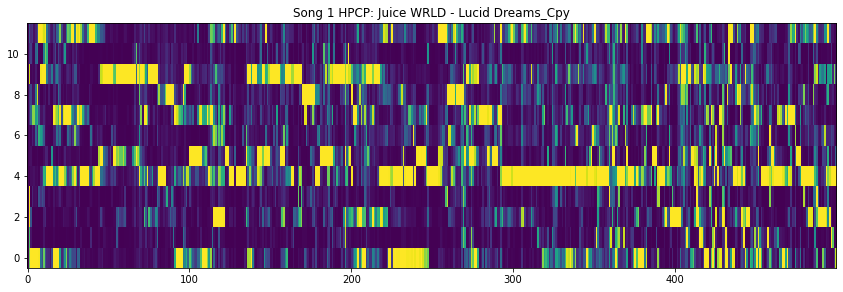

In [102]:
fig = plt.gcf()
fig.set_size_inches(14.5, 4.5)

plt.title("Song 1 HPCP: " + filename_list1[1])
plt.imshow(song_1_hpcp[:500].T, aspect='auto', origin='lower', interpolation='none')
plt.savefig(ext_drive_dir + 
            working_root_dir + 
            png_folder + 
            filename_list1[1]+'_hpcp.png')

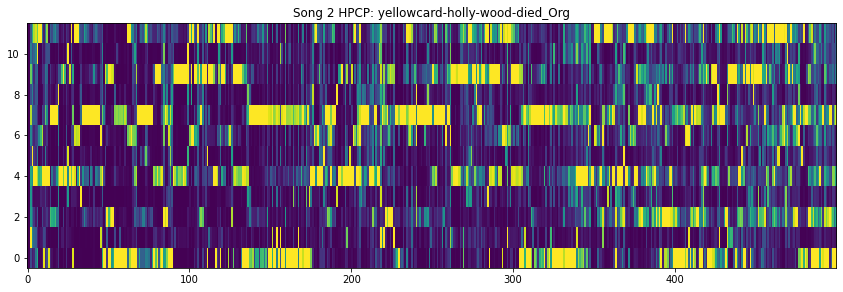

In [64]:
fig = plt.gcf()
fig.set_size_inches(14.5, 4.5)

plt.title("Song 2 HPCP: " + filename_list1[2])
plt.imshow(song_2_hpcp[:500].T, aspect='auto', origin='lower', interpolation='none')
plt.savefig(ext_drive_dir + 
            working_root_dir + 
            png_folder + 
            filename_list1[2]+'_hpcp.png')

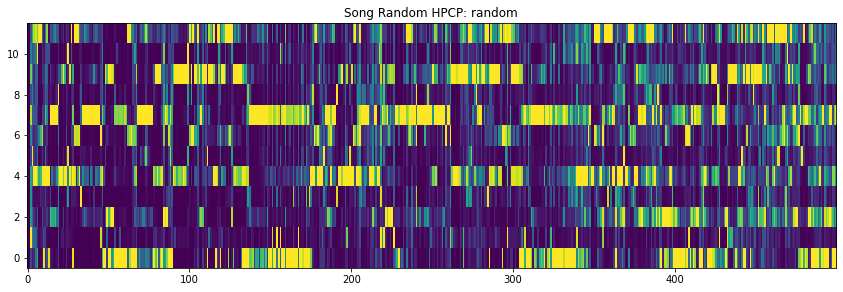

In [65]:
fig = plt.gcf()
fig.set_size_inches(14.5, 4.5)

plt.title("Song Random HPCP: " + filename_list1[0])
plt.imshow(song_2_hpcp[:500].T, aspect='auto', origin='lower', interpolation='none')
plt.savefig(ext_drive_dir + 
            working_root_dir + 
            png_folder + 
            filename_list1[0]+'_hpcp.png')

Next steps are done using the essentia ChromaCrossSimilarity function,

* Stacking input features
* Key invariance using Optimal Transposition Index (OTI) [3].
* Compute binary chroma cross similarity using cross recurrent plot as described in [1] or using OTI-based chroma binary method as detailed in [3]

In [66]:
crp = estd.ChromaCrossSimilarity(frameStackSize=9, 
                                 frameStackStride=1, 
                                 binarizePercentile=0.095,
                                 oti=True)

true_pair_crp = crp(song_1_hpcp, song_2_hpcp)
false_pair_crp = crp(song_1_hpcp, song_random_hpcp)

In [74]:
true_pair_crp.shape

(3741, 4370)

In [75]:
false_pair_crp.shape

(3741, 5021)

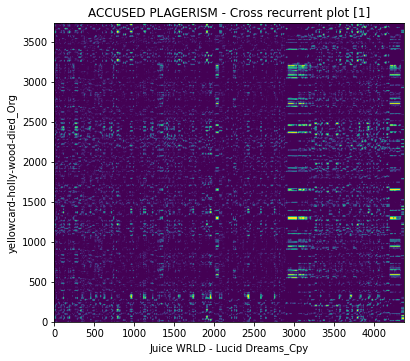

In [67]:
fig = plt.gcf()
fig.set_size_inches(15.5, 5.5)

plt.title('ACCUSED PLAGERISM - Cross recurrent plot [1]')
plt.xlabel(filename_list1[1])
plt.ylabel(filename_list1[2])
plt.imshow(true_pair_crp, origin='lower')
plt.savefig(ext_drive_dir + 
            working_root_dir + 
            png_folder + 
            filename_list1[1]+'_'+filename_list1[2]'_crp.png')

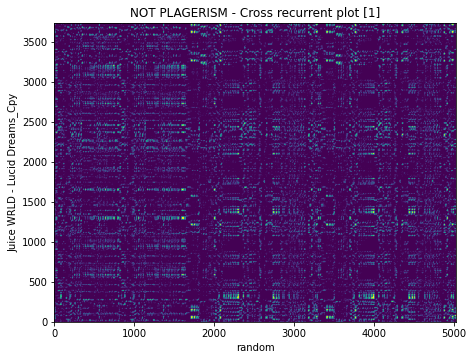

In [68]:
fig = plt.gcf()
fig.set_size_inches(15.5, 5.5)

plt.title('NOT PLAGERISM - Cross recurrent plot [1]')
plt.xlabel(filename_list1[0])
plt.ylabel(filename_list1[1])
plt.imshow(false_pair_crp, origin='lower')
plt.savefig(ext_drive_dir + 
            working_root_dir + 
            png_folder + 
            filename_list1[0]+'_'+filename_list1[1]'_crp.png')

Finally, we compute an asymmetric cover song similarity measure from the pre-computed binary cross simialrity matrix of cover/non-cover pairs using various contraints of smith-waterman sequence alignment algorithm (eg. serra09 or chen17).

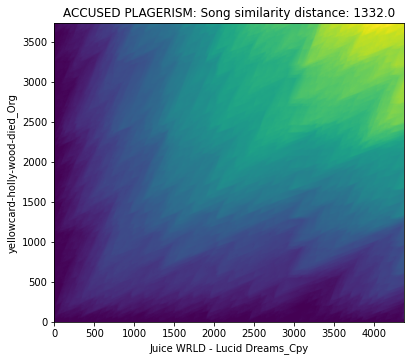

In [85]:
score_matrix, distance = estd.CoverSongSimilarity(disOnset=0.5, 
                                                  disExtension=0.5, 
                                                  alignmentType='chen17',
                                                  distanceType='symmetric')(true_pair_crp)

fig = plt.gcf()
fig.set_size_inches(15.5, 5.5)

plt.title('ACCUSED PLAGERISM: Song similarity distance: %s' % distance)
plt.xlabel(filename_list1[1])
plt.ylabel(filename_list1[2])
plt.imshow(score_matrix, origin='lower')
plt.savefig(ext_drive_dir + 
            working_root_dir + 
            png_folder + 
            filename_list1[1]+'_'+filename_list1[2]'_css.png')

In [86]:
print('Song similarity distance: %s' % distance)

Song similarity distance: 1332.0


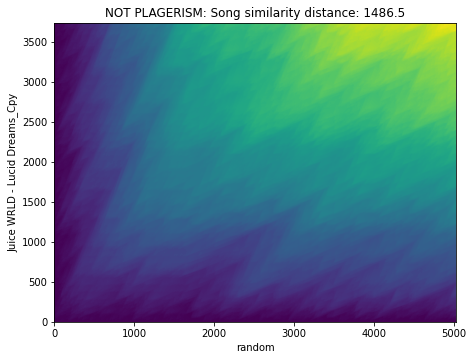

In [87]:
score_matrix, distance = estd.CoverSongSimilarity(disOnset=0.5, 
                                                  disExtension=0.5, 
                                                  alignmentType='chen17',
                                                  distanceType='symmetric')(false_pair_crp)

fig = plt.gcf()
fig.set_size_inches(15.5, 5.5)

plt.title('NOT PLAGERISM: Song similarity distance: %s' % distance)
plt.xlabel(filename_list1[0])
plt.ylabel(filename_list1[1])
plt.imshow(score_matrix, origin='lower')
plt.savefig(ext_drive_dir + 
            working_root_dir + 
            png_folder + 
            filename_list1[0]+'_'+filename_list1[1]'_css.png')

In [88]:
print('Song similarity distance: %s' % distance)

Song similarity distance: 1486.5


In [ ]:
def calculate_similarity(file1, file2):
    song_1 = estd.MonoLoader(filename=file1, sampleRate=32000)()
    song_2 = estd.MonoLoader(filename=file2, sampleRate=32000)()

    #calculate HPCP
    song_1_hpcp = hpcpgram(song_1, sampleRate=32000)
    song_2_hpcp = hpcpgram(song_2, sampleRate=32000)

    #plot HPCP
    fig = plt.gcf()
    fig.set_size_inches(14.5, 4.5)

    plt.title("Song 1 HPCP: " + file1)
    plt.imshow(song_1_hpcp[:500].T, aspect='auto', origin='lower', interpolation='none')
    plt.savefig(ext_drive_dir + 
                working_root_dir + 
                png_folder + 
                file1+'_hpcp.png')
    
    plt.title("Song 2 HPCP: " + file1)
    plt.imshow(song_2_hpcp[:500].T, aspect='auto', origin='lower', interpolation='none')
    plt.savefig(ext_drive_dir + 
                working_root_dir + 
                png_folder + 
                file2+'_hpcp.png')
    
    #Calculate ChromaCrossSimularity
    crp = estd.ChromaCrossSimilarity(frameStackSize=9, 
                                 frameStackStride=1, 
                                 binarizePercentile=0.095,
                                 oti=True)

    true_pair_crp = crp(song_1_hpcp, song_2_hpcp)
    
    #plot CRP
    fig = plt.gcf()
    fig.set_size_inches(15.5, 5.5)

    plt.title('Cross Recurrent Plot')
    plt.xlabel(file1)
    plt.ylabel(file2)
    plt.imshow(true_pair_crp, origin='lower')
    plt.savefig(ext_drive_dir + 
                working_root_dir + 
                png_folder + 
                file1+'_'+file2'_crp.png')
    
    #Calculate Distance with CSS
    score_matrix, distance = estd.CoverSongSimilarity(disOnset=0.5, 
                                                  disExtension=0.5, 
                                                  alignmentType='chen17',
                                                  distanceType='symmetric')(true_pair_crp)

    fig = plt.gcf()
    fig.set_size_inches(15.5, 5.5)

    plt.title('Song similarity distance: %s' % distance)
    plt.xlabel(file1)
    plt.ylabel(file2)
    plt.imshow(score_matrix, origin='lower')
    plt.savefig(ext_drive_dir + 
                working_root_dir + 
                png_folder + 
                file1+'_'+file2'_css.png')
    
    return distance